# How and what affects the review scores of airbnb most; location, value or hosts?

Sydney Airbnb Data Listing

Karen Stevani (z5573992)

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (30, 15)

In [4]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [5]:
#loading from file
if os.path.isfile("sydney_airbnb_listing.csv"):
    filepath = "sydney_airbnb_listing.csv"
    print("loading from file")
else:
    filepath = "https://data.insideairbnb.com/australia/nsw/sydney/2024-03-16/data/listings.csv.gz"
    print("loading from the internet")

listing_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [6]:
shp_file_name = r"gda2020 (1).zip"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/dowload/"
    "nsw_locality_polygon_shp.zip"
)

In [7]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.zipfile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [8]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, "wb") as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


Data Set: "Detailed Sydney Listings data" from insideairbnb.com

Published by: Inside Airbnb, licensed under a Creative Commons Attribution 4.0 International License, on 10 June 2024

This data explores ....

In [9]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1050164598350388320,https://www.airbnb.com/rooms/1050164598350388320,20240316023820,2024-03-18,city scrape,Self service English breakfast,Close to transport airport older style unit ne...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,211218678,...,NaN,NaN,NaN,PID-STRA-61891,f,1,0,1,0,NaN
1,1096082243192434668,https://www.airbnb.com/rooms/1096082243192434668,20240316023820,2024-03-18,city scrape,Apartment in Rushcutters Bay,Full 2 bedroom apartment with balcony. Walking...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,26721338,...,NaN,NaN,NaN,Exempt,f,2,1,1,0,NaN
2,2167538,https://www.airbnb.com/rooms/2167538,20240316023820,2024-03-18,city scrape,"Modern Sydney home near beach,shops",**Availability extremely flexible**<br /><br /...,Queens Park is a safe and friendly neighbourho...,https://a0.muscache.com/pictures/29922910/2399...,11059668,...,5.00,5.00,4.00,NaN,f,1,1,0,0,0.01
3,790607305500629830,https://www.airbnb.com/rooms/790607305500629830,20240316023820,2024-03-18,city scrape,Luxury double room,Relax in this tranquil and stylish space.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,202112801,...,4.77,4.68,4.68,PID-STRA-21723,f,30,5,25,0,2.13
4,641106357139201992,https://www.airbnb.com/rooms/641106357139201992,20240316023820,2024-03-18,city scrape,Chic Studio Apartment in Prime Bondi Location,Immerse yourself in the vibrant atmosphere of ...,Bondi is one of Australia’s most iconic suburb...,https://a0.muscache.com/pictures/prohost-api/H...,279001183,...,3.94,4.94,4.29,PID-STRA-36651,f,217,217,0,0,0.84


In [10]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

This dataset provides information on 14274 rows and 75 columns

In [11]:
listing_data.price

0        $100.00
1        $250.00
2        $650.00
3         $84.00
4        $508.00
          ...   
14269     $88.00
14270    $143.00
14271    $120.00
14272    $180.00
14273    $123.00
Name: price, Length: 14274, dtype: object

In [12]:
listing_data.accommodates

0        2
1        4
2        5
3        1
4        2
        ..
14269    2
14270    2
14271    4
14272    2
14273    2
Name: accommodates, Length: 14274, dtype: int64

In [13]:
listing_data['price'] = listing_data['price'].replace({'\$': '', ',': ''}, regex=True)
listing_data['price'] = pd.to_numeric(listing_data['price'], errors='coerce').astype('Int64')  # Use 'Int64' to handle NaN values
listing_data['price'] = listing_data['price'].fillna(0).astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\karen\AppData\Local\Temp\ipykernel_26728\2283849491.py:1: SyntaxWarning: invalid escape sequence '\$'
  listing_data['price'] = listing_data['price'].replace({'\$': '', ',': ''}, regex=True)


In [14]:
listing_data['standard_price'] = listing_data['price'] / listing_data['accommodates']
listing_data.standard_price

0         50.0
1         62.5
2        130.0
3         84.0
4        254.0
         ...  
14269     44.0
14270     71.5
14271     30.0
14272     90.0
14273     61.5
Name: standard_price, Length: 14274, dtype: float64

In [15]:
lower_bound = 0
upper_bound = 100
filtered_price = listing_data[(listing_data['standard_price'] >= lower_bound) & (listing_data['standard_price'] <= upper_bound)]

In [16]:
average_price = listing_data['price'].mean()
print(f"The average price is: ${average_price}")

average_standard_price = listing_data['standard_price'].mean()
print(f"The average price per person is: ${average_standard_price}")

The average price is: $395.94689645509317
The average price per person is: $95.22062845427966


In [17]:
burbs = gpd.read_file(shp_file_name)
burbs.set_crs(espg=5234, inplace=True, allow_override=True)
burbs.sample(2)

DriverError: '/vsizip/gda2020 (1).zip' not recognized as a supported file format.

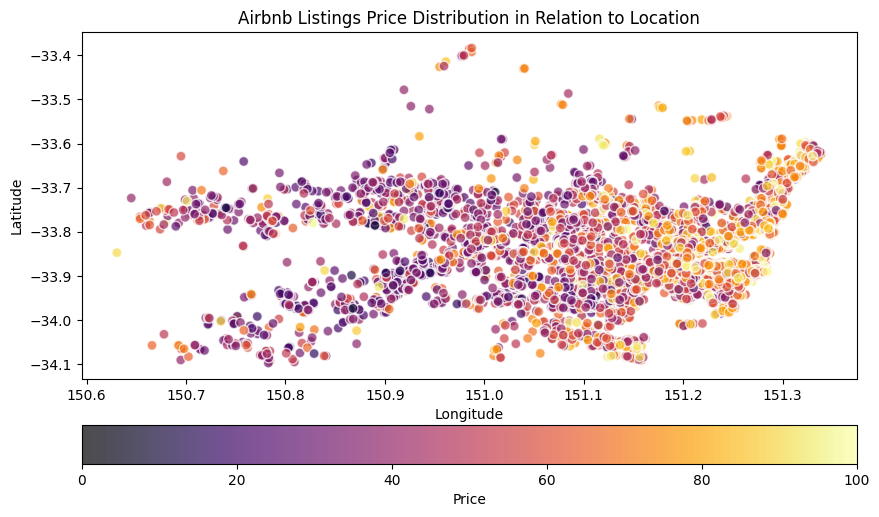

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    filtered_price['longitude'], 
    filtered_price['latitude'], 
    c=filtered_price['standard_price'], 
    cmap='inferno', 
    s=50, 
    alpha=0.7, 
    edgecolors='w'
)

cbar = plt.colorbar(scatter, orientation='horizontal', pad=0.1, ax=ax)
cbar.set_label('Price')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Airbnb Listings Price Distribution in Relation to Location')

plt.show()

In [19]:
listing_data.host_since

0        2018-08-22
1        2015-01-26
2        2014-01-06
3        2018-07-13
4        2019-07-24
            ...    
14269    2015-02-23
14270    2015-12-21
14271    2022-07-03
14272    2023-10-07
14273    2017-10-08
Name: host_since, Length: 14274, dtype: object

In [20]:
listing_data['host_since'] = pd.to_datetime(listing_data['host_since'])
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(listing_data.host_since.min(), date_format_pattern)
latest_date = datetime.strftime(listing_data.host_since.max(), date_format_pattern)
f"The range of someone becoming a host in Sydney is {earliest_date} to {latest_date}"

'The range of someone becoming a host in Sydney is June, 2009 to March, 2024'

In [23]:
listing_data['host_since'] = pd.to_datetime(listing_data['host_since'])
reference_date = pd.Timestamp('2024-08-01')
listing_data['days_since_start'] = (pd.Timestamp.today() - listing_data['host_since']).dt.days
listing_data.days_since_start

0        2178
1        3482
2        3867
3        2218
4        1842
         ... 
14269    3454
14270    3153
14271     767
14272     306
14273    2496
Name: days_since_start, Length: 14274, dtype: int64

In [48]:
average_age_as_host = listing_data['days_since_start'].mean()
print(f"The average age someone has become an airbnb host in Sydney is {average_age_as_host} days")

The average age someone has become an airbnb host in Sydney is 2622.159030404932 days


After calculations, the average age someone has become an airbnb host in Sydney is 2622.159030404932 days or roughly about 7 years, 2 months, and 5 days. With the new column calculated of how long (in terms of days) each person has become an airbnb host in Sydney, this is graphed compared to the other aspects issued and the main review scores


In [47]:
def nearest_multiple_of_100(x):
    return (x // 100) * 100

listing_data['duration_multiple_of_100'] = listing_data['days_since_start'].apply(nearest_multiple_of_100)
average_price_by_duration = listing_data.groupby('duration_multiple_of_100')['standard_price'].mean().reset_index()
average_price_by_duration.columns = ['Duration (Days Multiple of 100)', 'Average Price']
print(average_price_by_duration)

    Duration (Days Multiple of 100)  Average Price
0                               100      78.343556
1                               200     139.749828
2                               300      72.316843
3                               400      68.750081
4                               500      78.384695
5                               600      93.724136
6                               700      76.064550
7                               800      74.742092
8                               900      68.695944
9                              1000      94.138166
10                             1100      89.117514
11                             1200      88.512763
12                             1300      78.313478
13                             1400      87.547027
14                             1500      93.829903
15                             1600      96.496139
16                             1700      84.975321
17                             1800      83.441024
18                             

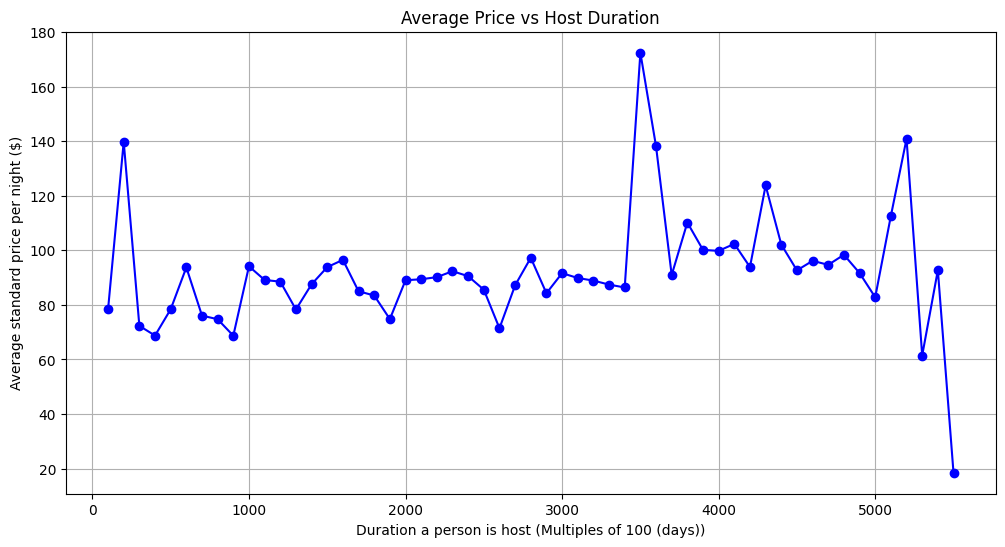

In [38]:
plt.figure(figsize=(12, 6))

plt.plot(
    average_price_by_duration['Duration (Days Multiple of 100)'], 
    average_price_by_duration['Average Price'], 
    marker='o', 
    linestyle='-', 
    color='b'
)

plt.xlabel('Duration a person is host (Multiples of 100 (days))')
plt.ylabel('Average standard price per night ($)')
plt.title('Average Price vs Host Duration')
plt.grid(True)
plt.show()

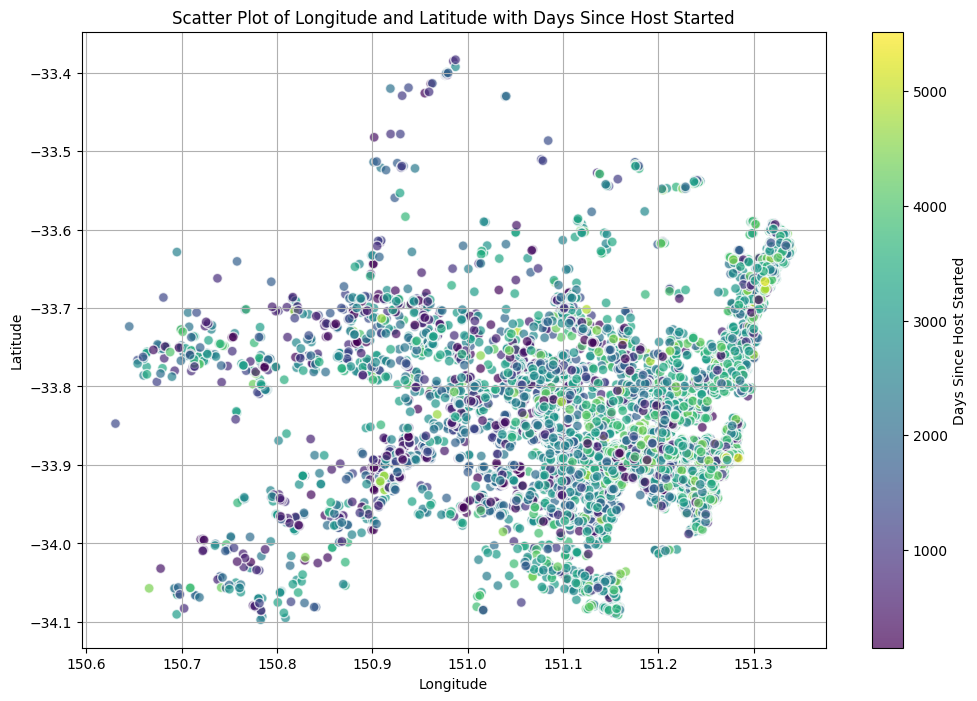

In [46]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    listing_data['longitude'], 
    listing_data['latitude'], 
    c=listing_data['days_since_start'], 
    cmap='viridis', 
    alpha=0.7,       
    s=50,            
    edgecolors='w'   
)

plt.colorbar(scatter, label='Days Since Host Started')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude and Latitude with Days Since Host Started')
plt.grid(True)
plt.show()

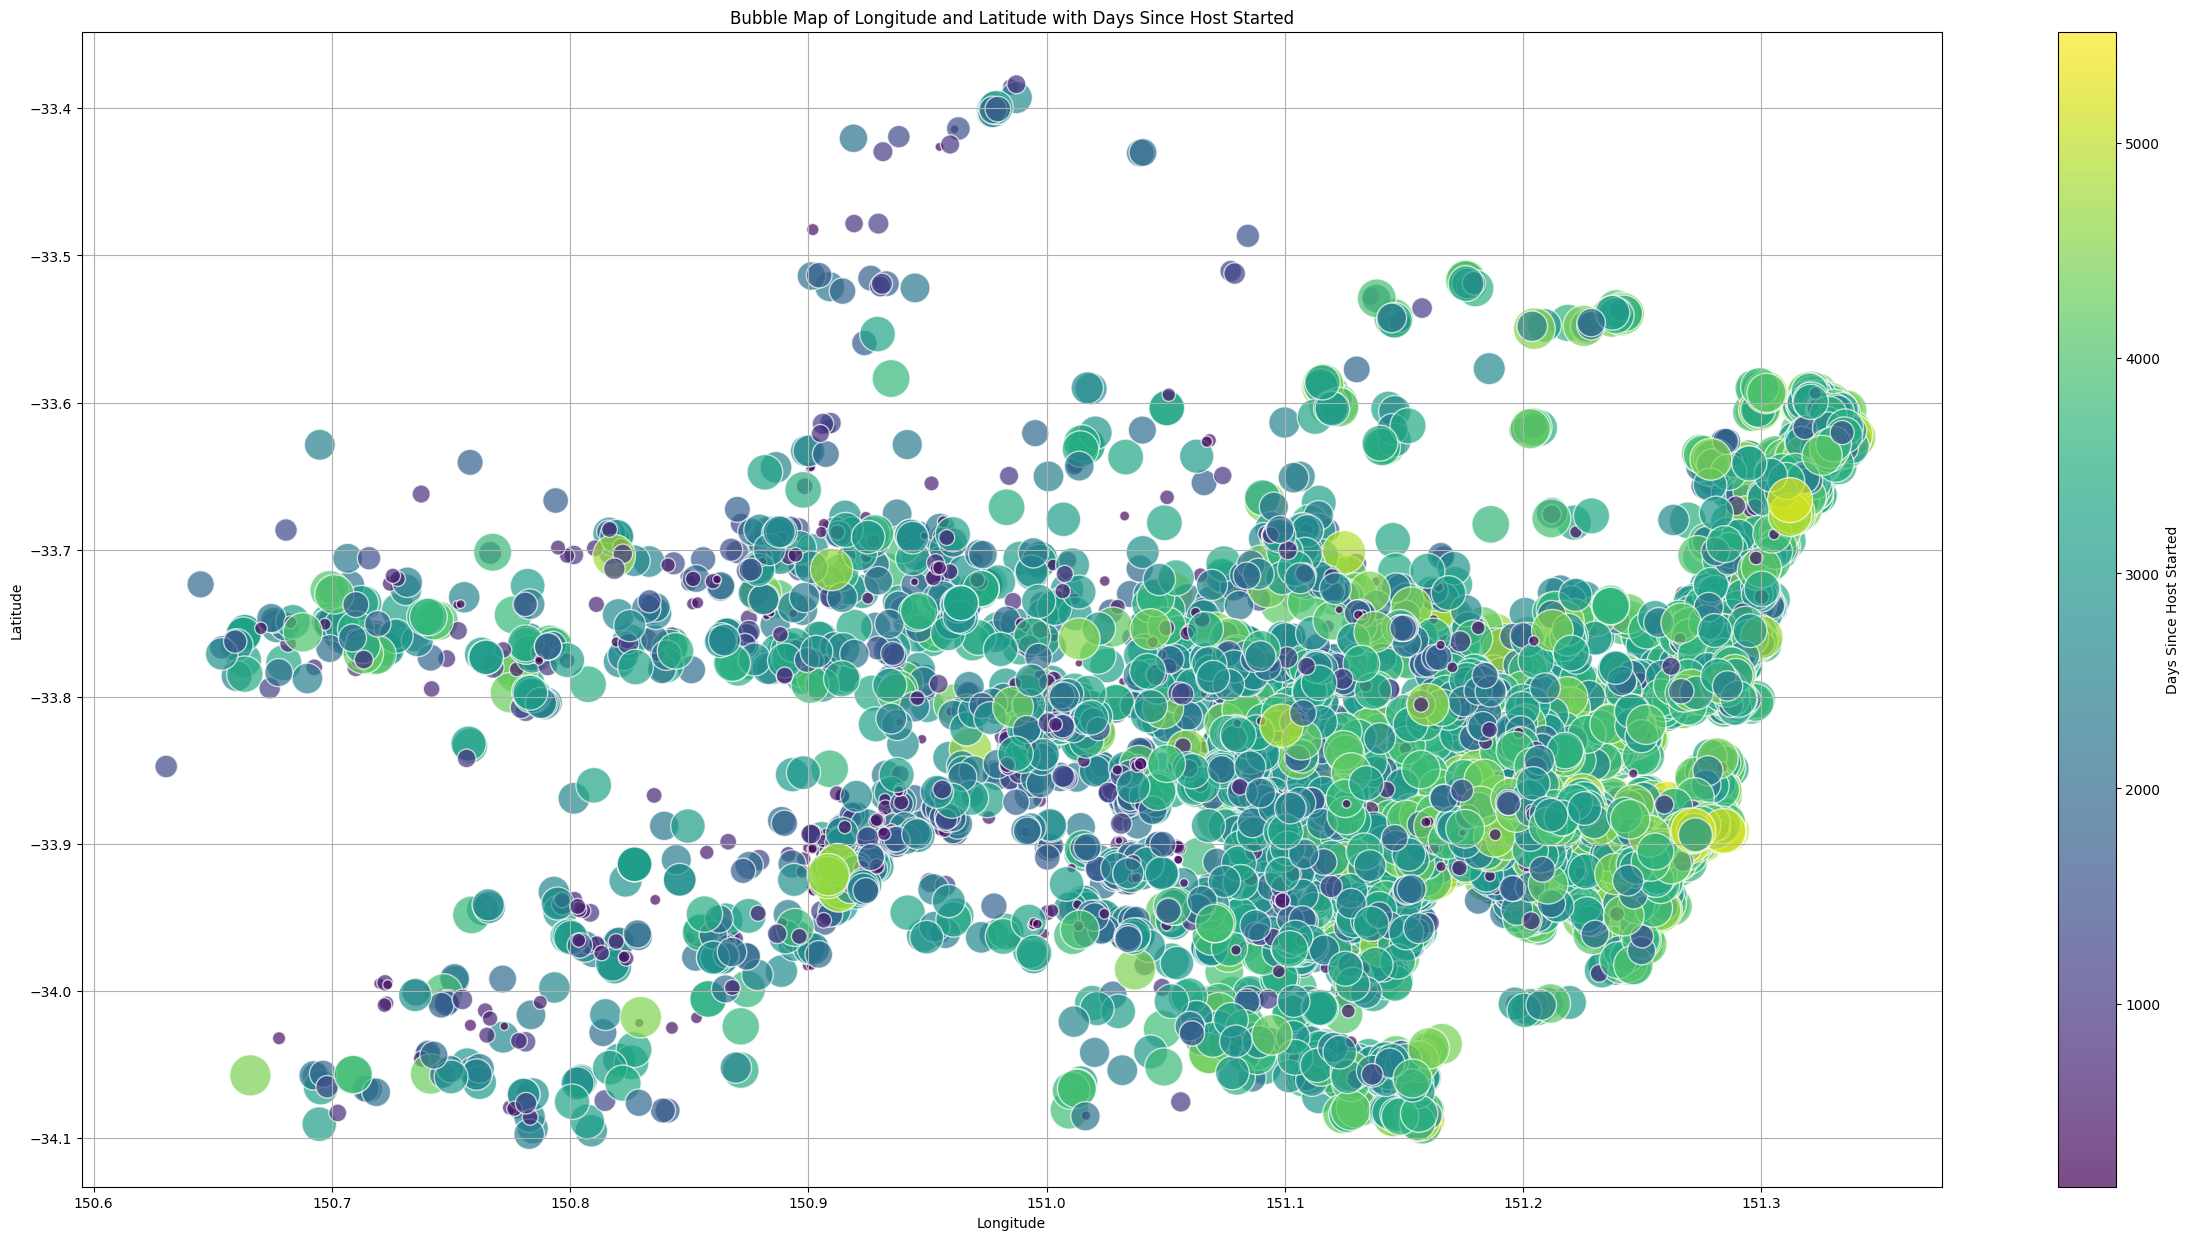

In [45]:
plt.scatter(
    listing_data['longitude'], 
    listing_data['latitude'], 
    s=listing_data['days_since_start'] / 5, 
    c=listing_data['days_since_start'], 
    cmap='viridis',  
    alpha=0.7,     
    edgecolors='w' 
)

# Add color bar
plt.colorbar(label='Days Since Host Started')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bubble Map of Longitude and Latitude with Days Since Host Started')

# Show plot
plt.grid(True)
plt.show()

In [43]:
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[listing_data['latitude'].mean(), listing_data['longitude'].mean()], zoom_start=12)

# Add heatmap
heat_data = [[row['latitude'], row['longitude'], row['days_since_start']] for index, row in listing_data.iterrows()]
HeatMap(heat_data).add_to(m)

# Save map to HTML file
m.save('heatmap.html')

Now that we have explored the patterns between aspects with each other, let us refer back to the main question and compare each of them with review scores and how they affect them. 

In [52]:
listing_data.review_scores_rating

0         NaN
1         NaN
2        4.00
3        4.71
4        4.00
         ... 
14269    4.57
14270    4.87
14271    4.96
14272     NaN
14273    4.98
Name: review_scores_rating, Length: 14274, dtype: float64

In [68]:
review_cleaned = listing_data.dropna(subset=['review_scores_rating'])
listing_data.review_scores_rating

0        0
1        0
2        4
3        4
4        4
        ..
14269    4
14270    4
14271    4
14272    0
14273    4
Name: review_scores_rating, Length: 14274, dtype: int32

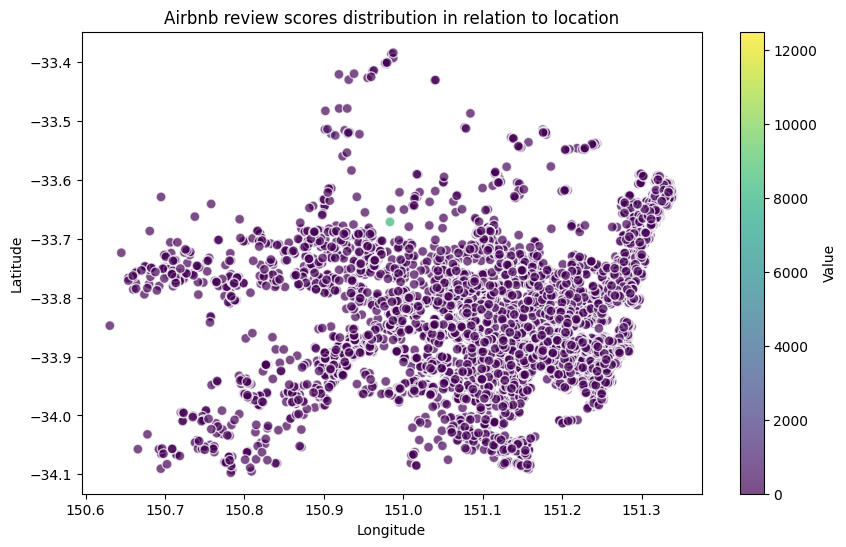

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(listing_data['longitude'], listing_data['latitude'], c=listing_data['standard_price'], cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.colorbar(label='Value')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb review scores distribution in relation to location')

# Show the plot
plt.show()

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(listing_data['longitude'], listing_data['latitude'], c=listing_data['filtered'], cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.colorbar(label='Value')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb review scores distribution in relation to location')

# Show the plot
plt.show()

KeyError: 'filtered'

<Figure size 1000x600 with 0 Axes>

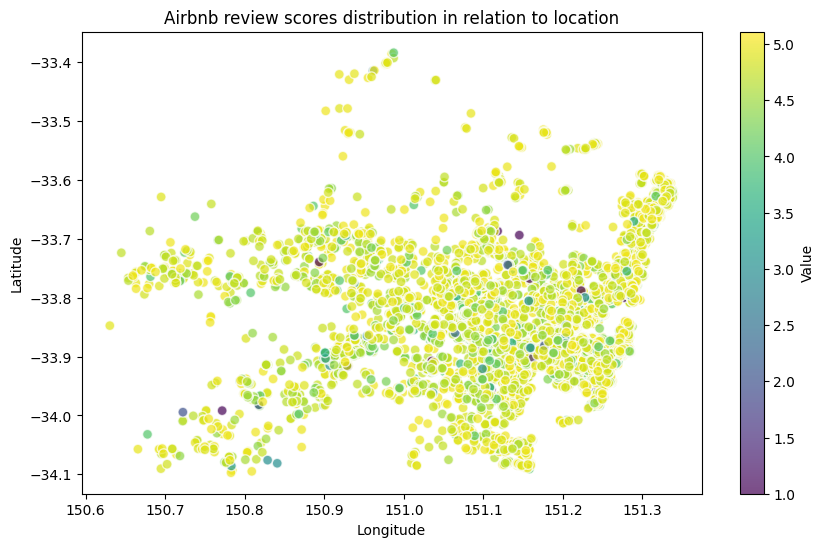

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(listing_data['longitude'], listing_data['latitude'], c=listing_data['review_scores_rating'], cmap='viridis', s=50, alpha=0.7, edgecolors='w')

plt.colorbar(label='Value')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb review scores distribution in relation to location')

# Show the plot
plt.show()